In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

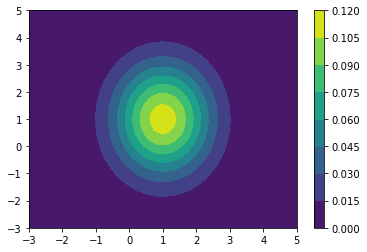

In [2]:
# Problem 5-a
x = np.linspace(-3, 5, 1000)
y = np.linspace(-3, 5, 1000)
X,Y = np.meshgrid(x, y)

# Reference:
# rv = scipy.stats.multivariate_normal(mean=None, cov=1, allow_singular=False)
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html

rv = scipy.stats.multivariate_normal([1, 1], [[1, 0], [0, 2]])
Z = rv.pdf(np.array([Y, X]).T)
plt.contourf(X, Y, Z)
plt.colorbar()
plt.show()

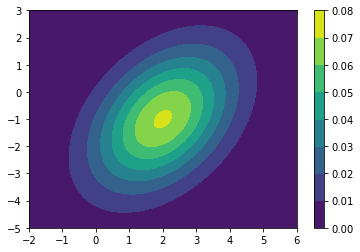

In [3]:
# Problem 5-b
x = np.linspace(-2, 6, 1000)
y = np.linspace(-5, 3, 1000)
X,Y = np.meshgrid(x, y)

rv = scipy.stats.multivariate_normal([-1, 2], [[2, 1], [1, 3]])
Z = rv.pdf(np.array([Y, X]).T)
plt.contourf(X, Y, Z)
plt.colorbar()
plt.show()

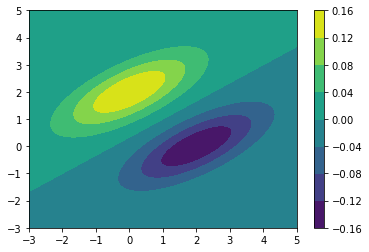

In [4]:
# Problem 5-c
x = np.linspace(-3, 5, 1000)
y = np.linspace(-3, 5, 1000)
X,Y = np.meshgrid(x, y)

rv1 = scipy.stats.multivariate_normal([0, 2], [[2, 1], [1, 1]])
rv2 = scipy.stats.multivariate_normal([2, 0], [[2, 1], [1, 1]])
Z = rv1.pdf(np.array([Y, X]).T) - rv2.pdf(np.array([Y, X]).T)
plt.contourf(X, Y, Z)
plt.colorbar()
plt.show()

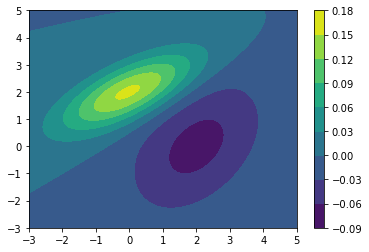

In [5]:
# Problem 5-d
x = np.linspace(-3, 5, 1000)
y = np.linspace(-3, 5, 1000)
X,Y = np.meshgrid(x, y)

rv1 = scipy.stats.multivariate_normal([0, 2], [[2, 1], [1, 1]])
rv2 = scipy.stats.multivariate_normal([2, 0], [[2, 1], [1, 3]])
Z = rv1.pdf(np.array([Y, X]).T) - rv2.pdf(np.array([Y, X]).T)
plt.contourf(X, Y, Z)
plt.colorbar()
plt.show()

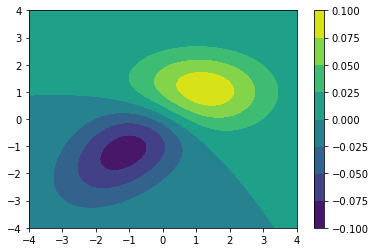

In [6]:
# Problem 5-e
x = np.linspace(-4, 4, 1000)
y = np.linspace(-4, 4, 1000)
X,Y = np.meshgrid(x, y)

rv1 = scipy.stats.multivariate_normal([1, 1], [[2, 0], [0, 1]])
rv2 = scipy.stats.multivariate_normal([-1, -1], [[2, 1], [1, 2]])
Z = rv1.pdf(np.array([Y, X]).T) - rv2.pdf(np.array([Y, X]).T)
plt.contourf(X, Y, Z)
plt.colorbar()
plt.show()

In [7]:
# X1 ~ N(3, 9)
X1 = np.random.normal(loc=3, scale=3, size=100)
# X2 ~ 1/2X1 + N(4, 4)
X2 = np.random.normal(loc=4, scale=2, size=100)
samples = np.array([np.array((x1, 0.5*x1 + x2)) for (x1, x2) in zip(X1, X2)])

In [8]:
# Problem 6-a
sampleMean = [samples[:,0].mean(), samples[:,1].mean()]
print("Sample mean:", sampleMean)

Sample mean: [3.3536235278081024, 5.864329381262027]


In [9]:
# Problem 6-b
covMatrix = np.cov(samples.T)
print("Covariance matrix:", covMatrix)

Covariance matrix: [[7.22270481 3.32906455]
 [3.32906455 5.57320476]]


In [10]:
# Problem 6-c
eigenvalues, eigenvectors = np.linalg.eig(covMatrix)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)

Eigenvalues: [9.8276608  2.96824877]
Eigenvectors: [[ 0.7875508  -0.61624974]
 [ 0.61624974  0.7875508 ]]


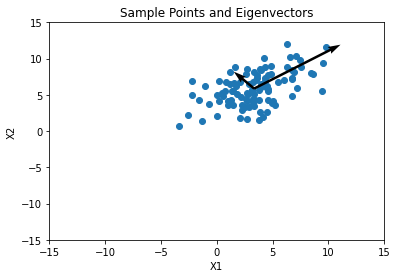

In [11]:
# Problem 6-d
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.title("Sample Points and Eigenvectors")
plt.xlabel("X1")
plt.ylabel("X2")

# Plot sample points
plt.scatter(samples[:,0], samples[:,1])
X = [sampleMean[0], sampleMean[0]]
Y = [sampleMean[1], sampleMean[1]]
U = [eigenvectors[0][0]*eigenvalues[0], eigenvectors[0][1]*eigenvalues[1]]
V = [eigenvectors[1][0]*eigenvalues[0], eigenvectors[1][1]*eigenvalues[1]]

# Reference:
# matplotlib.pyplot.quiver([X, Y], U, V, [C])
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html

plt.quiver(X, Y, U, V, scale_units="xy", angles="xy", scale=1)
plt.show()

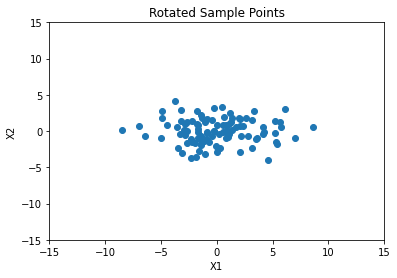

In [12]:
# Problem 6-e
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.title("Rotated Sample Points")
plt.xlabel("X1")
plt.ylabel("X2")

# Plot rotated sample points
rotatedPoints = np.dot(eigenvectors.T, (samples-sampleMean).T).T
plt.scatter(rotatedPoints[:,0], rotatedPoints[:,1])
plt.show()